In [2]:
import sklearn
from sklearn.datasets import make_blobs
from scipy.spatial import ConvexHull as chull
from matplotlib import pyplot as plt
import numpy as np

In [9]:
blobs, classes = make_blobs(n_samples=1000,
                   n_features=10,
                   cluster_std=1.0,
                   center_box=(-10.0, 10.0),
                   shuffle=True,
                   random_state=10,
                   return_centers=False)
blobs = blobs[classes==0]

In [17]:
#collapse
W = np.random.uniform(-1,1,size=(blobs.shape[1],1))
y = blobs@W
#y = (blobs@W).reshape(-1)

In [18]:
y.shape

(334, 1)

In [19]:
#collapse
hull = chull(np.hstack((y, blobs[:, :1])))
from skmatter.sample_selection import DirectionalConvexHull as DCH
dch = DCH([0]).fit(blobs, y).selected_idx_

dch = dch[np.argsort(blobs[dch][:, 0])]

/Users/victorprincipe/local/code/miniconda3/envs/paper-ore-test/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
plt.rc('font', size=10)

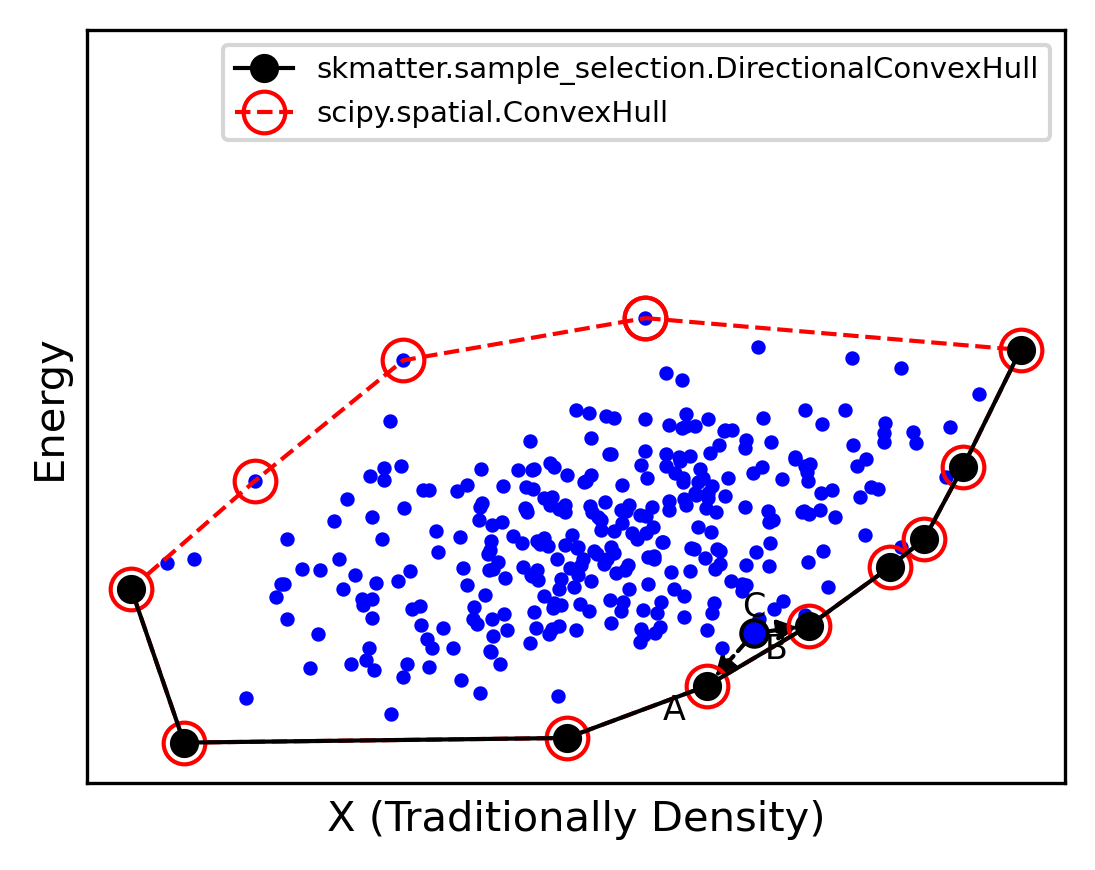

In [7]:
#collapse
plt.figure(figsize=(3.75,3), dpi=300)
plt.scatter(blobs[:, 0], y, s=6, c="b")
plt.plot(
    blobs[dch, 0],
    y[dch],
    c="k",
    marker="o",
    lw=1,
    zorder=10,
    label="skmatter.sample_selection.DirectionalConvexHull",
)
plt.plot(
    blobs[[*hull.vertices, hull.vertices[0]], 0],
    y[[*hull.vertices, hull.vertices[0]]],
    color="r",
    mfc="none",
    mec="r",
    markersize=10,
    linestyle="dashed",
    lw=1,
    zorder=9,
    marker="o",
    label="scipy.spatial.ConvexHull",
)

A = dch[len(dch) // 2 - 1]
B = dch[len(dch) // 2]
d = y.copy()

d[A] = d[B] = 100
d[blobs[:, 0]<blobs[A,0] + 0.25 * (blobs[B,0]-blobs[A,0])] = 100
d[blobs[:, 0]>blobs[B,0] - 0.25 * (blobs[B,0]-blobs[A,0])] = 100
C = np.argmin(d
)
plt.annotate(
    "A", (blobs[A][0], y[A]), (blobs[A][0]-0.2, y[A] - 0.2), ha="center", va="top", fontsize=8
)
plt.annotate(
    "B", (blobs[B][0], y[B]), (blobs[B][0]-0.2, y[B] - 0.2), ha="center", va="top", fontsize=8
)
plt.annotate(
    "C", (blobs[C][0], y[C]), (blobs[C][0], y[C] + 0.25), ha="center", va="bottom", fontsize=8
)
plt.scatter(blobs[C][0], y[C], c="b", s=40, ec='k')
plt.annotate(
    "",
    (blobs[C][0] + 0.95 * (blobs[A][0] - blobs[C][0]), y[C] + 0.95 * (y[A] - y[C])),
    (blobs[C][0], y[C]),
    arrowprops=dict(color="k", arrowstyle="-|>", linestyle="dashed"),
    zorder=-1,
)
plt.annotate(
    "",
    (blobs[C][0] + 0.95 * (blobs[B][0] - blobs[C][0]), y[C] + 0.95 * (y[B] - y[C])),
    (blobs[C][0], y[C]),
    arrowprops=dict(color="k", arrowstyle="-|>", linestyle="dashed"),
    zorder=-1,
)

plt.gca().set_ylim([min([plt.ylim()[0]-0.5, y[A] - 0.75, y[B] - 0.75]), 2 * plt.ylim()[1]])
plt.gca().set_ylabel(r"Energy")
plt.gca().set_yticks([])
plt.gca().set_xlabel(r"X (Traditionally Density)")
plt.gca().set_xticks([])
plt.legend(loc=1, fontsize=7)
plt.tight_layout()
plt.savefig('toy_dch.png')
plt.savefig('toy_dch.pdf')
plt.show()